# Data Profiling - LMA Features Data

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from CSV

In [2]:
data = pd.read_csv('datasets/pa/LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/REDUCED_LMA_DATA.csv')

In [4]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,-0.5,0.6
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,-0.5,0.6
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,-0.5,0.6
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,-0.5,0.6
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,-0.5,0.6


## Data Analysis

### Data Shape

In [6]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 2 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)
print('Entries to Feature Ratio:', entries2variables_ration)

No. entries: 43039 
No. Features: 34
Entries to Feature Ratio: 1265.8529411764705


### Variable Types

In [7]:
print("Feature Types:\n" + str(data.dtypes))

Feature Types:
avg_hand_distance            float64
avg_l_hand_hip_distance      float64
avg_r_hand_hip_distance      float64
avg_feet_distance            float64
avg_l_hand_chest_distance    float64
avg_r_hand_chest_distance    float64
avg_l_elbow_hip_distance     float64
avg_r_elbow_hip_distance     float64
avg_chest_pelvis_distance    float64
avg_neck_chest_distance      float64
avg_neck_rotation_w          float64
avg_neck_rotation_x          float64
avg_neck_rotation_y          float64
avg_neck_rotation_z          float64
avg_pelvis_rotation_w        float64
avg_pelvis_rotation_x        float64
avg_pelvis_rotation_y        float64
avg_pelvis_rotation_z        float64
std_l_hand_position          float64
std_r_hand_position          float64
avg_l_forearm_velocity       float64
avg_r_forearm_velocity       float64
avg_pelvis_velocity_x        float64
avg_pelvis_velocity_y        float64
avg_pelvis_velocity_z        float64
avg_l_foot_velocity_x        float64
avg_l_foot_velocity_y  

### Granularity

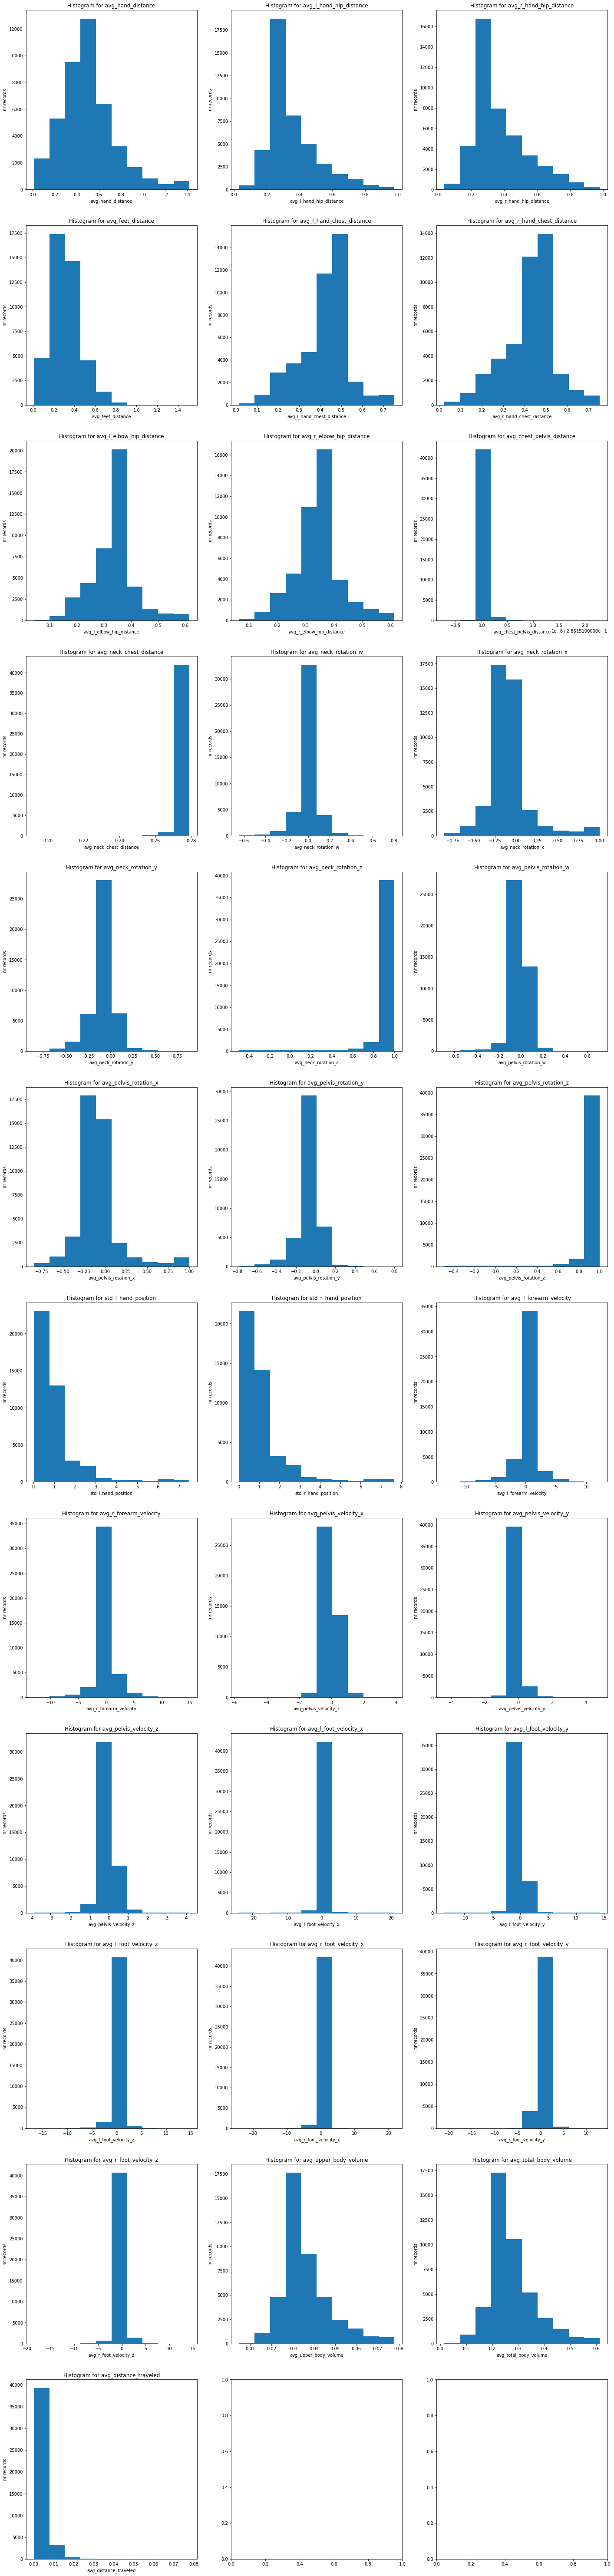

In [16]:
variables = data.drop(columns=['EMOTION_P', 'EMOTION_A'])
variables = variables.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values)

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Correlation Analysis

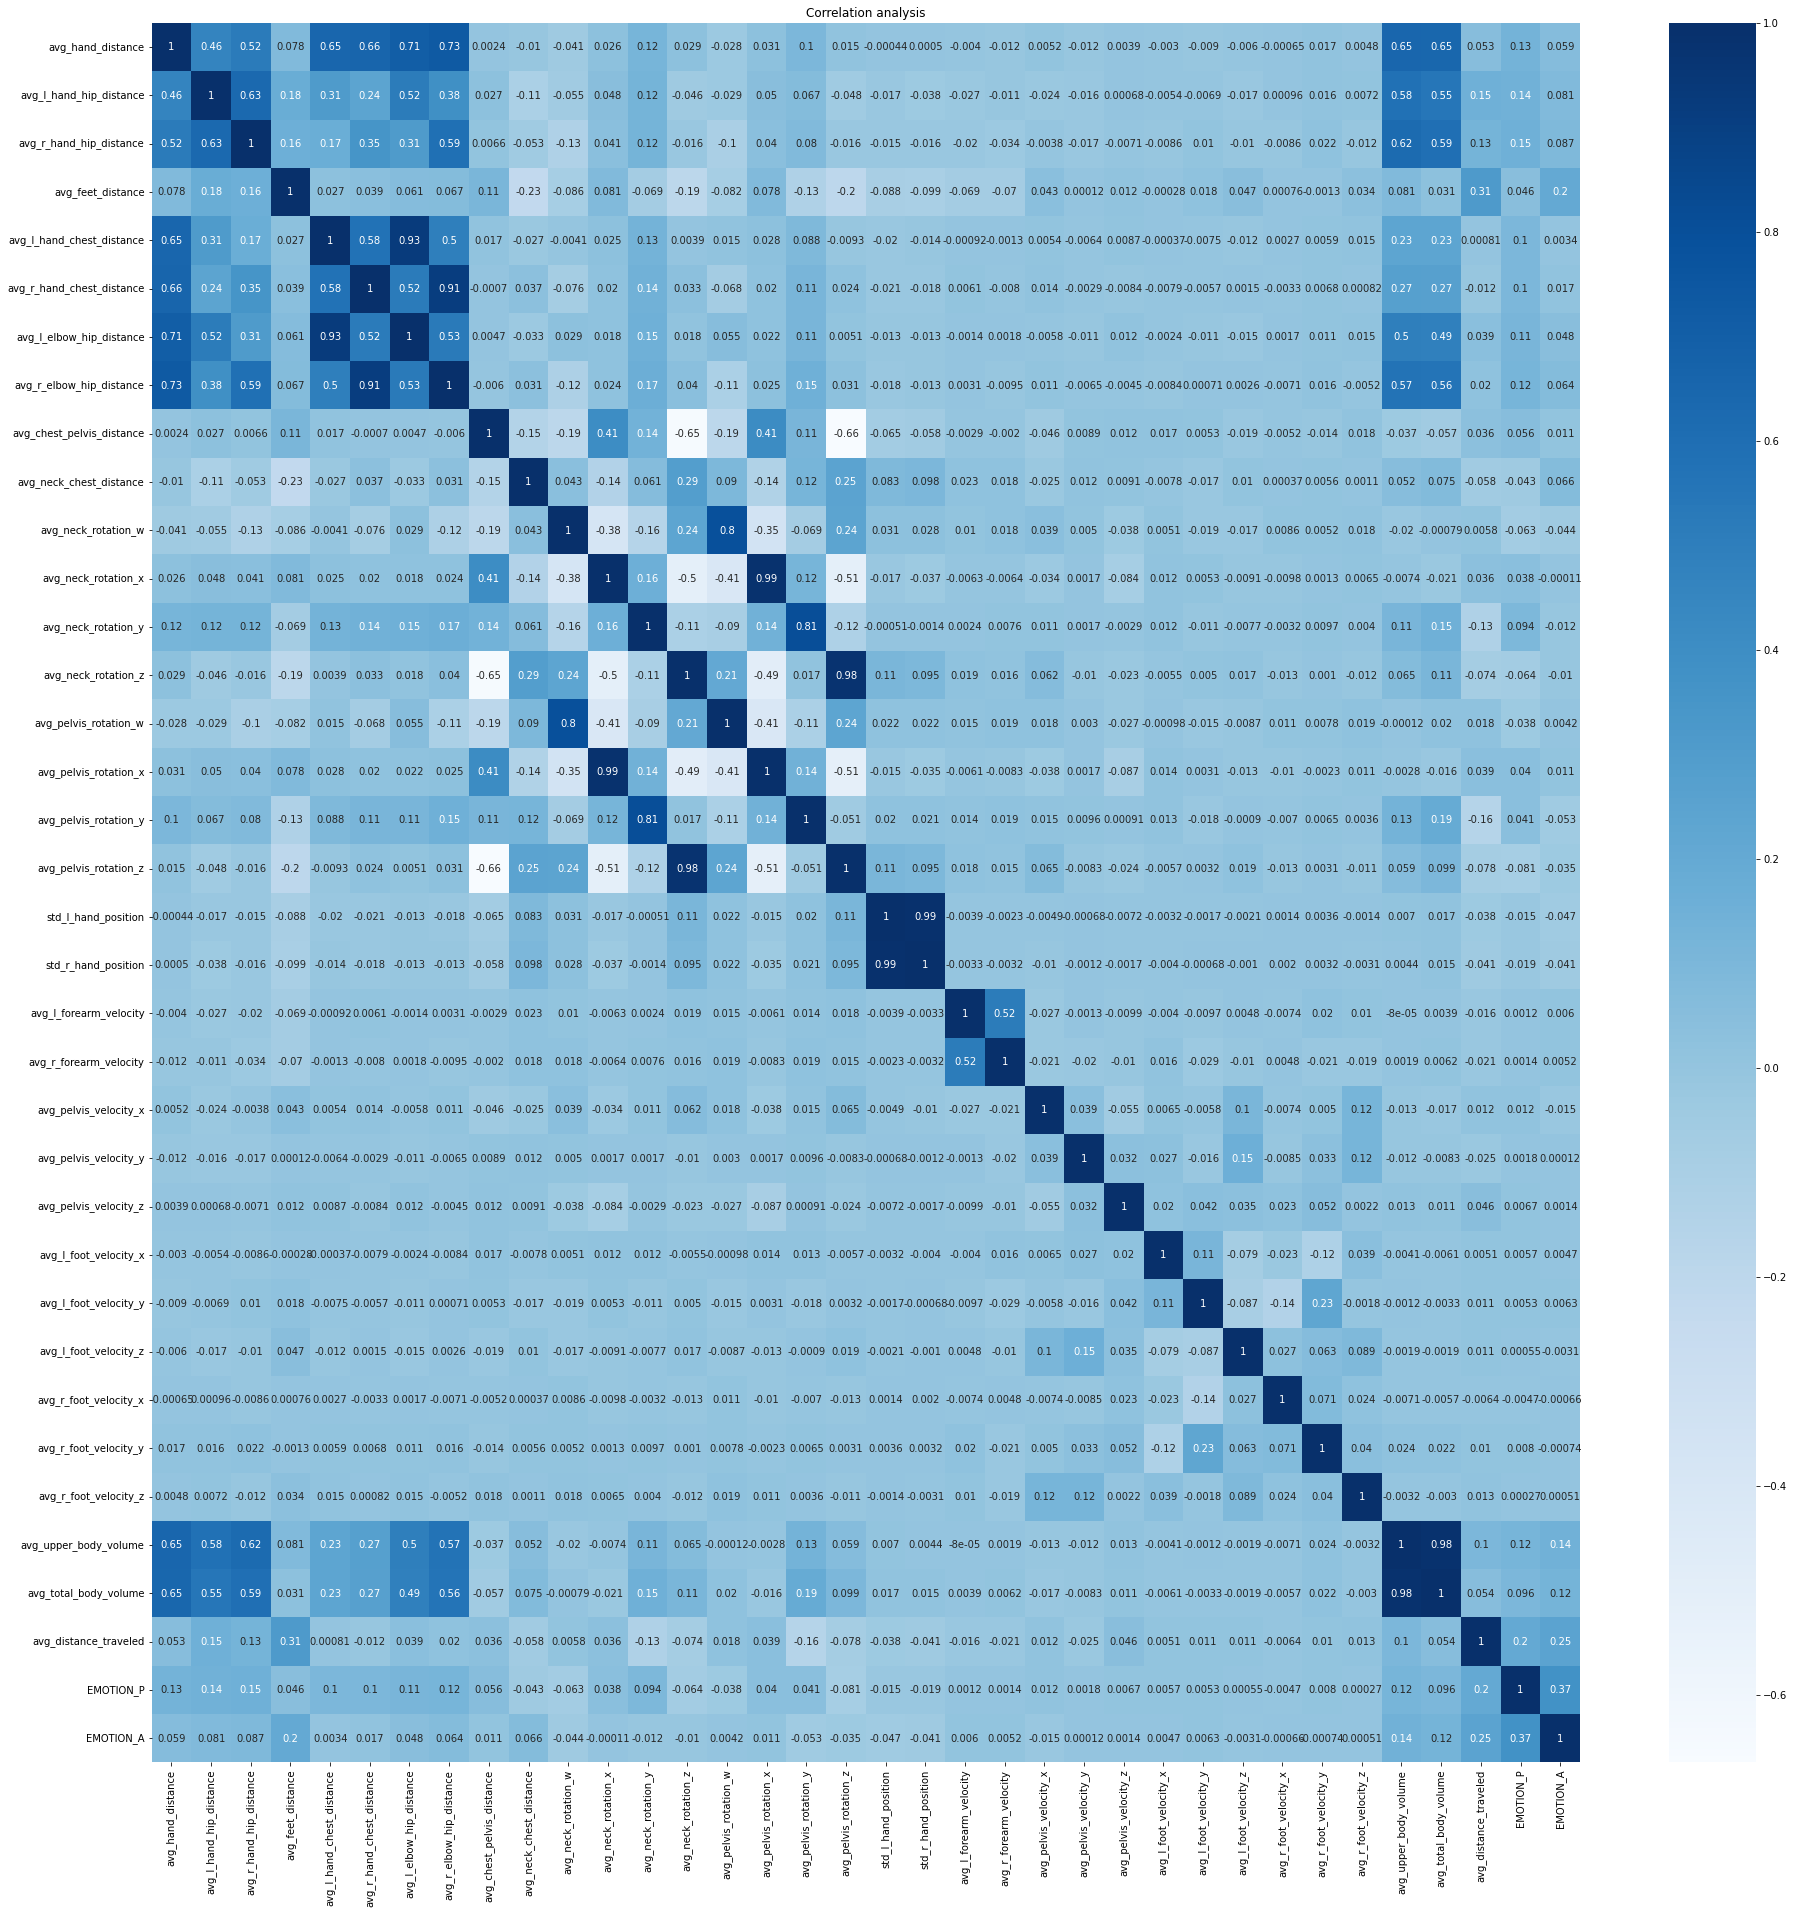

In [17]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [20]:
df = pd.DataFrame(data)

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
avg_hand_distance            0.131267
avg_l_hand_hip_distance      0.144179
avg_r_hand_hip_distance      0.149279
avg_feet_distance            0.045754
avg_l_hand_chest_distance    0.101829
avg_r_hand_chest_distance    0.100222
avg_l_elbow_hip_distance     0.110844
avg_r_elbow_hip_distance     0.117776
avg_chest_pelvis_distance    0.055979
avg_neck_chest_distance      0.043295
avg_neck_rotation_w          0.062695
avg_neck_rotation_x          0.037636
avg_neck_rotation_y          0.093825
avg_neck_rotation_z          0.064475
avg_pelvis_rotation_w        0.037697
avg_pelvis_rotation_x        0.039689
avg_pelvis_rotation_y        0.040775
avg_pelvis_rotation_z        0.081058
std_l_hand_position          0.015363
std_r_hand_position          0.019009
avg_l_forearm_velocity       0.001250
avg_r_forearm_velocity       0.001386
avg_pelvis_velocity_x        0.011626
avg_pelvis_velocity_y        0.001758
avg_pelvis_velocity_z        0.006